# Program 4: Benchmarking Heaps
### Mikhail Filippov

---
In this assigment, we will implement **three** approaches to heapifying an array. Specifically, we are trying to build a max heap. The three approaches will be:
1. Insertion Method: Insert elements one at a time into the heap
2. Bubble down until value is bigger than both children (we'll call this "Bubble Method 1")
3. Bubble down all the way, then bubble up until value is smaller than parent (we'll call this "Bubble Method 2")

With each one, we will benchmark on **sorted**, **reverse sorted**, and **random** arrays to test the `heapify` method and analyze using regression techniques to estimate asymptotic time complexity for each case.

---

### Planned Approach
For our three cases to benchmark, we will be using **sorted**, **reverse sorted**, and **randomly shuffled** lists to heapify with each approach. Generating each list won't be too much of a problem, and we will increase the size of each list linearly to look at the graphs and slopes generated by the dependant time output by the benchmarks.

Expected results and predictions:
1. Insertion method: We know that an insertion takes $O(log(n))$ time, so to insert $n$ number of elements, we should get a time complexity of $O(n\times log(n))$. Since we are inserting at the end of the heap and bubbling up, the expected best case should be a **reverse sorted** list, as we will be adding the biggest element at `A[0]` first, followed by all elements at `A[i]` with $i \gt 0$, with each element `A[i+1]` $\lt$ `A[i]`. This allows for all smaller elements to be added to the bottom and not needed to be bubbled up. This, should, reduce our best case runtime to $O(n)$, as we are adding elements in costant time $n$ number of times now.
2. Bubble Method 1: We know the recurrence relation for this method is $T(n)=2T(\frac{n}{2}) + \Theta(log(n))$. In the best case though, **reverse sorted** again, the $\Theta(log(n))$ part is insignificant. This reduces our recurrence to $T(n)=2T(\frac{n}{2}) + \Theta(1)$ since we still need to call `BubbleDown`. This is still reduced to $O(n)$, but it should theoretically run faster than any other case.
3. Bubble Method 2: This approach's best case should be the **sorted** list. This happens since no matter what, we bubble each value down **all** the way, and bubble back up *until the value is smaller than parent*. In a sorted list, this ensures that all of the smaller values will be bubbled down to the end and won't have to be bubble back up. The asymptotic running time for this should be $O(n)$.

---

### Heapification Approaches
#### 1. Insertion
```py
def insertion_heapify(A):
    """
    Heapify using insertion method and adding elements one by one
    """
    heap = []
    for i in range(len(A)):
        insert(heap, A[i])
    A[:] = heap
```

#### 2. Heapification Function
```py
def heapify(A, bubble_down=bubble_method_1):
    """
    Heapify using the passed in bubble_down method and build the heap buttom up
    """
    heapify_h(A, 0, bubble_down)

def heapify_h(A, i, bubble_down):
    """
    Heapify wrapper calling helper
    """
    if i < len(A)//2:
        heapify_h(A, left(i), bubble_down)
        heapify_h(A, right(i), bubble_down)
        bubble_down(A, i)
```

#### 2a. Bubble Method 1
```py
def bubble_method_1(A, i):
    """
    Bubble down until value is bigger than both children (we'll call this "Bubble Method 1")
    Choose the bigger child and swap with it while comparing with itself, then repeat until no more swaps are needed
    """
    n = len(A)
    l = left(i)
    r = right(i)
    while (l < n and A[i] < A[l]) or (r < n and A[i] < A[r]):
        if l < n and r < n:
            # left
            if A[l] > A[r]:
                temp = A[l]
                A[l] = A[i]
                A[i] = temp
                i = l
            # right
            else:
                temp = A[r]
                A[r] = A[i]
                A[i] = temp
                i = r
        elif l < n:
            # left
            temp = A[l]
            A[l] = A[i]
            A[i] = temp
            i = l
        elif r < n:
            # right
            temp = A[r]
            A[r] = A[i]
            A[i] = temp
            i = r
        l = left(i)
        r = right(i)
```

#### 2b. Bubble Method 2
```py
def bubble_method_2(A, i):
    """
    Bubble down all the way, then bubble up until value is smaller than parent
    Choose the bigger child and swap with it all the way down, then go back up until smaller than parent
    """
    n = len(A)
    l = left(i)
    r = right(i)
    while l < n:
        if r < n:
            # left
            if A[l] > A[r]:
                temp = A[l]
                A[l] = A[i]
                A[i] = temp
                i = l
            # right
            else:
                temp = A[r]
                A[r] = A[i]
                A[i] = temp
                i = r
        else:
            # left
            temp = A[l]
            A[l] = A[i]
            A[i] = temp
            i = l
        l = left(i)
        r = right(i)
    
    # bubble up
    parent_i = parent(i)
    while i > 0 and A[parent_i] < A[i]:
        temp = A[parent_i]
        A[parent_i] = A[i]
        A[i] = temp
        i = parent_i
        parent_i = parent(i)
```

*Note: The appendix will contain the full source code implementations for the three approaches and their respective descriptions, as well as any helper methods not described above.*

---

### Benchmarking

In [104]:
import dill
import pandas as pd
df = None
with open('heapify_benchmark.db', 'rb') as f:
    df = dill.load(f)
    df = df.astype('float32')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In order to effectively benchmark, a list of **100 size values** was used, ranging `20,000` to `2,000,000` in steps of `20,000` to keep linearity in the graph.

The results show that the `insertion` method on a sorted list performed the **worst** out of *any* benchmark by far, although it still appears linear on the graph. The best case for `insertion` was reverse sorted. For the other two methods, `bubble method 1` and `bubble method 2`, the results were consistent accross all cases, with `bubble method 1` being the best method overall for all cases except the reverse sorted list, where it performed the same as `insertion`. The graphs along with their tables representing these relationships can be seen below:

#### Functions Graphed with Cases
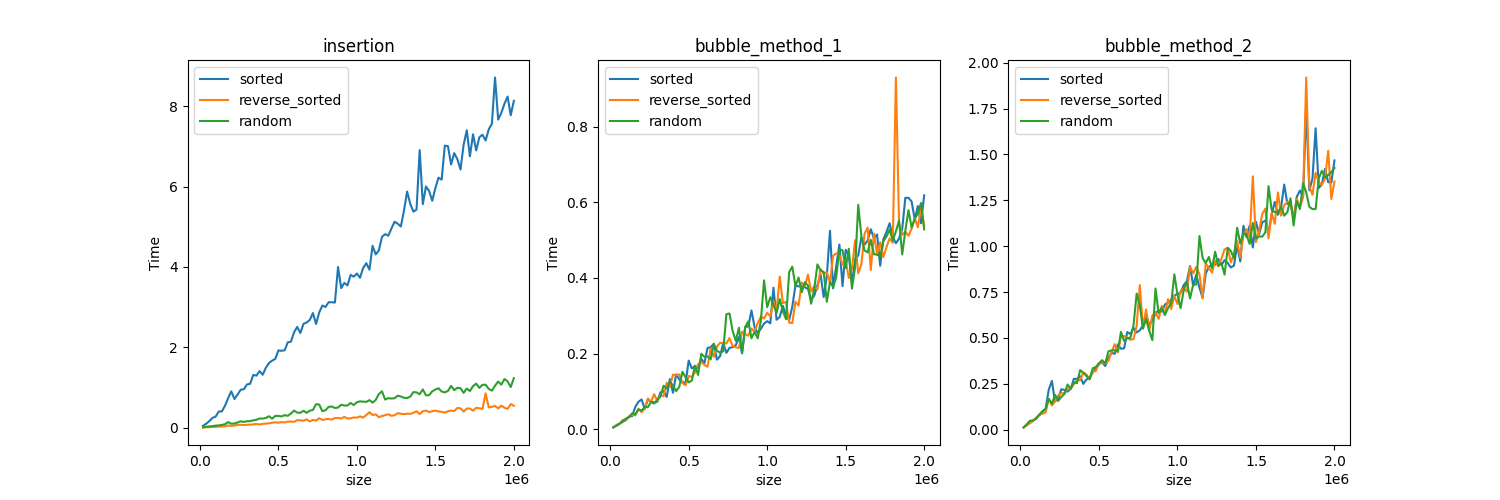
The table is listed below:

In [105]:
df

sorted  reverse_sorted    random
method          size                                       
insertion       20000    0.045537        0.004663  0.008509
                40000    0.098389        0.009318  0.021394
                60000    0.163001        0.011982  0.032811
                80000    0.243311        0.019163  0.037184
                100000   0.274680        0.019555  0.051603
                120000   0.401513        0.028707  0.056209
                140000   0.405875        0.027991  0.069824
                160000   0.547294        0.035418  0.087427
                180000   0.737126        0.056284  0.139329
                200000   0.904769        0.043569  0.099155
                220000   0.712207        0.051891  0.103179
                240000   0.825174        0.069393  0.131554
                260000   0.944627        0.074699  0.158704
                280000   0.956449        0.065388  0.144471
                300000   1.076029        0.071435  0.160059
                320000   1.091567        0.076153  0.162478
                340000   1.313120        0.081850  0.183049
                360000   1.294574        0.091096  0.194974
                380000   1.407758        0.080315  0.229591
                400000   1.316853        0.094026  0.225884
                420000   1.491036        0.101531  0.241709
                440000   1.607520        0.108967  0.284244
                460000   1.667969        0.123632  0.224216
                480000   1.710639        0.133435  0.292578
                500000   1.922495        0.124499  0.292993
                520000   1.913166        0.137872  0.279481
                540000   1.926768        0.131448  0.312205
                560000   2.123789        0.152824  0.294815
                580000   2.140429        0.150175  0.354657
                600000   2.374345        0.145777  0.425456
                620000   2.508260        0.188046  0.374832
                640000   2.353572        0.181752  0.370012
                660000   2.586131        0.171461  0.421121
                680000   2.616957        0.208490  0.369166
                700000   2.679156        0.154695  0.422651
                720000   2.852380        0.192123  0.441009
                740000   2.578773        0.175787  0.583975
                760000   2.865786        0.236217  0.575889
                780000   3.039124        0.191864  0.410745
                800000   3.003829        0.209003  0.434902
                820000   3.121313        0.217995  0.518600
                840000   3.121405        0.199812  0.525704
                860000   3.112754        0.241530  0.490223
                880000   3.997786        0.241664  0.500244
                900000   3.471544        0.227389  0.571238
                920000   3.603910        0.268457  0.550536
                940000   3.539551        0.229599  0.553197
                960000   3.801804        0.231916  0.616049
                980000   3.756247        0.253934  0.563885
                1000000  3.836056        0.249507  0.633780
                1020000  3.729624        0.280909  0.655106
                1040000  3.973086        0.252417  0.647881
                1060000  4.092168        0.312539  0.642326
                1080000  3.932088        0.387307  0.685880
                1100000  4.525342        0.314593  0.622706
                1120000  4.310204        0.331822  0.691307
                1140000  4.410767        0.262741  0.836564
                1160000  4.751768        0.290291  0.905895
                1180000  4.814604        0.312328  0.699333
                1200000  4.775984        0.334998  0.735719
                1220000  4.955630        0.295523  0.724457
                1240000  5.124683        0.310603  0.733953
                1260000  5.076342        0.363330  0.796121
                1280000  5.004168        0.345360  0.774391
                1300000  5.403249        0.338479  0.744581
       

#### Cases Graphed with Functions
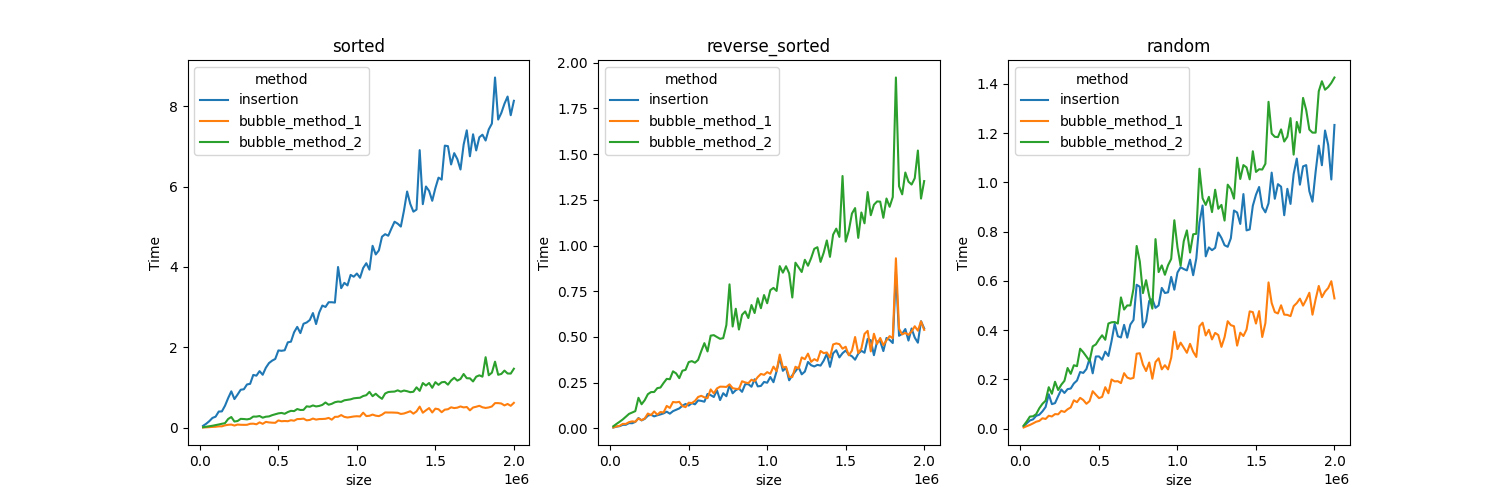
The table is listed below:

In [106]:
df.T

method         insertion                                                    \
size             20000     40000     60000     80000     100000    120000    
sorted          0.045537  0.098389  0.163001  0.243311  0.274680  0.401513   
reverse_sorted  0.004663  0.009318  0.011982  0.019163  0.019555  0.028707   
random          0.008509  0.021394  0.032811  0.037184  0.051603  0.056209   

method                                                                      \
size             140000    160000    180000    200000    220000    240000    
sorted          0.405875  0.547294  0.737126  0.904769  0.712207  0.825174   
reverse_sorted  0.027991  0.035418  0.056284  0.043569  0.051891  0.069393   
random          0.069824  0.087427  0.139329  0.099155  0.103179  0.131554   

method                                                                      \
size             260000    280000    300000    320000    340000    360000    
sorted          0.944627  0.956449  1.076029  1.091567  1.313120  1.294574   
reverse_sorted  0.074699  0.065388  0.071435  0.076153  0.081850  0.091096   
random          0.158704  0.144471  0.160059  0.162478  0.183049  0.194974   

method                                                                      \
size             380000    400000    420000    440000    460000    480000    
sorted          1.407758  1.316853  1.491036  1.607520  1.667969  1.710639   
reverse_sorted  0.080315  0.094026  0.101531  0.108967  0.123632  0.133435   
random          0.229591  0.225884  0.241709  0.284244  0.224216  0.292578   

method                                                                      \
size             500000    520000    540000    560000    580000    600000    
sorted          1.922495  1.913166  1.926768  2.123789  2.140429  2.374345   
reverse_sorted  0.124499  0.137872  0.131448  0.152824  0.150175  0.145777   
random          0.292993  0.279481  0.312205  0.294815  0.354657  0.425456   

method                                                                      \
size             620000    640000    660000    680000    700000    720000    
sorted          2.508260  2.353572  2.586131  2.616957  2.679156  2.852380   
reverse_sorted  0.188046  0.181752  0.171461  0.208490  0.154695  0.192123   
random          0.374832  0.370012  0.421121  0.369166  0.422651  0.441009   

method                                                                      \
size             740000    760000    780000    800000    820000    840000    
sorted          2.578773  2.865786  3.039124  3.003829  3.121313  3.121405   
reverse_sorted  0.175787  0.236217  0.191864  0.209003  0.217995  0.199812   
random          0.583975  0.575889  0.410745  0.434902  0.518600  0.525704   

method                                                                      \
size             860000    880000    900000    920000    940000    960000    
sorted          3.112754  3.997786  3.471544  3.603910  3.539551  3.801804   
reverse_sorted  0.241530  0.241664  0.227389  0.268457  0.229599  0.231916   
random          0.490223  0.500244  0.571238  0.550536  0.553197  0.616049   

method                                                                      \
size             980000    1000000   1020000   1040000   1060000   1080000   
sorted          3.756247  3.836056  3.729624  3.973086  4.092168  3.932088   
reverse_sorted  0.253934  0.249507  0.280909  0.252417  0.312539  0.387307   
random          0.563885  0.633780  0.655106  0.647881  0.642326  0.685880   

method                                                                      \
size             1100000   1120000   1140000   1160000   1180000   1200000   
sorted          4.525342  4.310204  4.410767  4.751768  4.814604  4.775984   
reverse_sorted  0.314593  0.331822  0.262741  0.290291  0.312328  0.334998   
random          0.622706  0.691307  0.836564  0.905895  0.699333  0.735719   

method                                                                      \
size        

---
### Estimation of Asymptotic Time Through Regression

In [107]:
import numpy as np
from scipy.stats import linregress

sizes = [20000*x for x in range(1, 101)]
for method in ['insertion', 'bubble_method_1', 'bubble_method_2']:
    for case in df.columns:
        m, b, _, _, _ = linregress(np.log(sizes), np.log(df.xs(method)[case]))
        print(f'{method} {case} slope: {m}')

insertion sorted slope: 1.1059210527665222
insertion reverse_sorted slope: 1.0591775875284313
insertion random slope: 1.0474240078738088
bubble_method_1 sorted slope: 1.0288813976889206
bubble_method_1 reverse_sorted slope: 1.0320753508263623
bubble_method_1 random slope: 1.0479284543668155
bubble_method_2 sorted slope: 1.0144507975853638
bubble_method_2 reverse_sorted slope: 1.0378875239466805
bubble_method_2 random slope: 1.0064983162969732


We can see from the above fitted regression models to the logorithms of each variable that almost all slopes $m$ are close to $1$. This helps show that the big-Theta runtimes for each case and function is $\Theta(n)$. The one exception is for the `Inverted` method on the sorted case, where the slope is higher, and therefore can be said to be of $\Theta(n\times logn)$.

---

### Summary
In conclusion, we can see the different results produces by our three methods of heapification (`Insertion`, `Bubble Method 1`, `Bubble Method 2`) through the benchmarking and regression analysis performed in this report. The benchmarking demonstrated a strong linear relation for every method and case, except for `Insertion` and its sorted case which needed more investigation. This was later proven by our regression analysis, which showed that the latter combination can be said to run in $\Theta(n\times logn)$, which the graph supports by being the worst combination of all, reaching beyond **8 seconds** of runtime when compared to sub **2 seconds** for the other algorithms on the same sorted list.

What's further interesting is the fact that `Bubble Method 1` only does better than `Bubble Method 2` on the sorted and randomly shuffled list, whereas they do about the same on a reverse sorted list. This comes as a surprise, as generally the reverse sorted list should be `Bubble Method 2`'s worst case. This leaves room for discussion (which will happen in the following questions).

In [108]:
print(df.loc[('insertion',2000000)])
print(df.loc[('bubble_method_1',2000000)])
print(df.loc[('bubble_method_2',2000000)])

sorted            8.132941
reverse_sorted    0.546665
random            1.233093
Name: (insertion, 2000000), dtype: float32
sorted            0.618615
reverse_sorted    0.538771
random            0.528556
Name: (bubble_method_1, 2000000), dtype: float32
sorted            1.467212
reverse_sorted    1.352686
random            1.425900
Name: (bubble_method_2, 2000000), dtype: float32


1. **Does the empirically-determined runtime match the theoretic run time? If not, what might have caused the discrepancy?**

For the most part, yes. For both `Bubble Method 1` and `Bubble Method 2`, we got linear slopes, which is what we expected ($\Theta(n)$) for each case no matter what. The interesting part comes with `Insertion`. While the best case is confirmed by the empirical data of regressive analysis, having a linear slope, it is only slightly larger than $1$ for the worst case, a sorted list; however, it is still a significant part larger than linear, making it fall into $\Theta(n\times logn)$. This can be confirmed by the graph, which for that specific combination (`Insertion` and a sorted list) has the biggest runtimes and a not-so-linear relationship.

2. **Was there a noticeable difference between sorted, reverse-sorted, and random data? If so, describe the difference and explain why you think it exists**

`Insertion`: This approach did by far the worst in a sorted list. This confirms with why, since it had to bubble up each element in order all the way to the top, as each consecutive element being inserted will be the largest in the heap up to that point. The alternate stands true as well, as the best case (reverse sorted) did noticiably better, even when compared against randomly shuffled.

`Bubble Method 1`: An interesting observation about this approach is that there was little noticiable difference between any of the cases, proving this to be an effective heapification method which keeps runtimes low (hence, it being taught to us). It is important to note, though, that its worst case (sorted list) is running a good percentage longer than the other two cases, as seen by the statement printed above of the last element for each approach.

`Bubble Method 2`: Once again, this approach almost had no noticiable differences between its 3 cases. A worthy note is that this approach was significantly slower than `Bubble Method 1`, and hence should usually not be used. Furthermore, as the note for `Bubble Method 1` stated, this approach's best case (reverse sorted) ran slightly faster than both the sorted and randomly sorted lists, which proves our theory for that being the best case.

3. **What runtime effect do you get by using heapify vs. adding all elements to an empty heap? Explain!**

Adding all elements to an empty heap (`Insertion` approach) did just as well on its best case (reverse sorted) as, say, `Bubble Method 1`, which we determined to be the best heapification approach. However, as the case for `Insertion` gets worse, we can see the time grow at some rate and increase much faster than our heapifications. When it comes to the actual resulting heap, both of the heapification approaches produced the same heaps, while `Insertion` produced some other heap variation *which was still correct*.

4. **Compare bubbling down and stopping short to bubbling all the way down, then back up. When might each approach be better?**

When we do the former (`Bubble Method 1` / the one we did in class), we not only choose the bigger child to swap with, but we do an additional check to make sure that the value is smaller than its children in the first place, which gives us that "stopping short" characteristic. This check is removed on the way down for the latter approach (`Bubble Method 2`), but instead we don't have to check anything other than the inverse of that on the way back up, where we stop at a point when the value's parent is greater than itself. `Bubble Method 1` is good overall since it reduces unnecessary swaps. A good use case for `Bubble Method 2` may be when you have a sorted list, and you know that all values need to be pushed all the way down in order to complete a heapification.